In [15]:
library(ggplot2)
library(dplyr)
library(magrittr)
library(tidyr)
library(stringr)
library(repr)
survey <- read.csv('./2010 Survey - Student Data - 437 responses.csv')
names(survey)[63] <- 'totfriends'

Robin Dunbar a famous anthropologist argued that humans only have the capacity to keep track of so many people at a time. He argued that the maximum number of people humans could keep track of is 150. This number is called Dunbar's number (Links to an external site.). Some have interpreted this to mean that any individual person has on average about 150 friends. 

Some technologists have argued that social media and modern information technology allow individuals to keep track of more people. For example, Facebook algorithmically organizes and presents information about our Facebook friends in a centralized feed lowering the costs associated with keeping in contact with all these people.

Fortunately we can evaluate this claim because our colleague Prof. Vitak has collected data on Facebook usage among college students at a large university. Using this sample dataPreview the documentView in a new window and the codebookPreview the documentView in a new window which explains the variables evaluate the technologists's claim.

Question 1: Using the theoretical population mean and the sample provided conduct a one-sample t-test (with significance level alpha = 0.05) to determine whether individuals have more friends than would be expected by Dunbar's number. (R Hints: 1) convert .xls to .csv by saving as .csv in Excel this will make it easier to read in to R; 2) relabel the columns that you are going to use to one word labels with no spaces in Excel, this will make it easier to refer to them in R e.g. change "How old are you?" to "age" you don't need to do this with all columns, just the ones you plan to use.)  

a. Graph the total Facebook friend values for the sample. What is the shape?

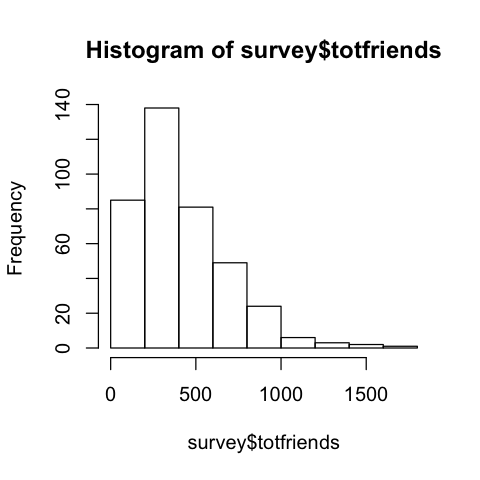

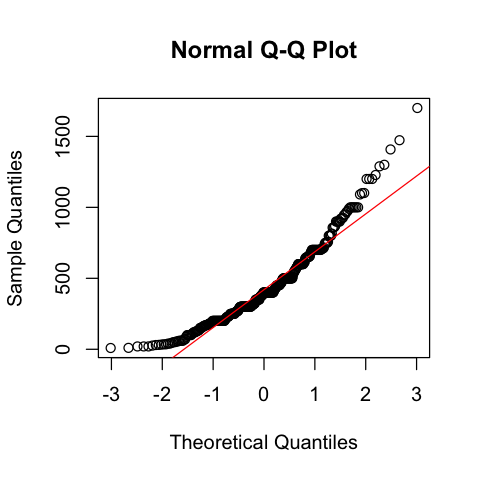

In [16]:
options(repr.plot.width=4, repr.plot.height=4)
hist(survey$totfriends)
qqnorm(survey$totfriends); qqline(survey$totfriends, col = 2)

b. State your null and alternative hypotheses.

In [149]:
N <- nrow(survey)
xbar <- mean(survey$totfriends, na.rm=T)

mu <- 𝝁 <- dunbar <- 150
IRdisplay::display_markdown(glue::glue('
Hypothesis: Students have more Facebook friends than predicted by Dunbar\'s number

$$H_0 : \\bar{{x}} = \\mu$$
$H_A : \\bar{{x}} \\ne \\mu \\quad$ two-tailed for more conservative evaluation

$\\mu: {fmt(𝝁)} \\quad$ Dunbar\'s number
$$\\bar{{x}}: {fmt(xbar)}$$
'))

Hypothesis: Students have more Facebook friends than predicted by Dunbar's number

$$H_0 : \bar{x} = \mu$$
$H_A : \bar{x} \ne \mu \quad$ two-tailed for more conservative evaluation

$\mu: 150 \quad$ Dunbar's number
$$\bar{x}: 433$$

In [152]:

IRdisplay::display_markdown(glue::glue('
df: {fmt(df)}\n
t-score: $\\dfrac{{\\bar{{x}} - \\mu}}{{s\\over{{\\sqrt{{n}}}}}}$ =
$\\dfrac{{ {fmt(xbar)} - {mu}}{{{fmt(s,2)}\\over{{\\sqrt{{{n}}}}}}}$ = {fmt(tscore,2)}
'))

df: 436

t-score: $\dfrac{\bar{x} - \mu}{s\over{\sqrt{n}}}$ =
$\dfrac{ 433 - 150}{275.34\over{\sqrt{474}}}$ = 21.49

c. Calculate your t-statistic

In [201]:
s <- sd(survey$totfriends, na.rm=T)
se <- s/sqrt(N)

tscore <- (xbar - mu) / (s/sqrt(N)) #  # week 6 slides, p. 23

IRdisplay::display_markdown(glue::glue('
t-score: $T_{{df}} = \\dfrac{{point\\;estimate - null\\;value}}{{SE}} \\quad$ week 6 slides, pp. 23, 51

SE: $\\dfrac{{s}}{{\\sqrt{{n}}}$ = $\\dfrac{{{fmt(s)}}{{\\sqrt{{{fmt(n,2)}}}}}$ = {fmt(se,2)}

$T = \\dfrac{{\\bar{{x}} - \\mu}}{{{{SE}}}$ 
$\\dfrac{{ {fmt(xbar)} - {mu}}}{{{fmt(se,2)}}} = {fmt(tscore,2)}$

'))

t-score: $T_{df} = \dfrac{point\;estimate - null\;value}{SE} \quad$ week 6 slides, pp. 23, 51

SE: $\dfrac{s}{\sqrt{n}}$ = $\dfrac{275}{\sqrt{474}}$ = 13.17

$T = \dfrac{\bar{x} - \mu}{{SE}}$ 
$\dfrac{ 433 - 150}{13.17} = 21.49$


d. Look up the probability for the t-statistic

In [162]:
df <- N - 1
p_tscore <- pt(tscore, df, lower.tail = F)

IRdisplay::display_markdown(glue::glue('
probability of t-statistic: *pt(tscore, df, lower.tail = F)* = {p_tscore}
'))

probability of t-statistic: *pt(tscore, df, lower.tail = F)* = 1.13892675278444e-70

In [209]:
t.test(survey$totfriends, mu=mu)



	One Sample t-test

data:  survey$totfriends
t = 20.271, df = 388, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 150
95 percent confidence interval:
 405.5476 460.4421
sample estimates:
mean of x 
 432.9949 


e. What is the effect size?

In [208]:
effect_size <- cohend <- (xbar - mu) / s
critical_t <- tstar <- qt(1 - alpha/2, df)
IRdisplay::display_markdown(glue::glue('
Cohen\'s d = $\\dfrac{{point\\;estimate - null\\;value}}{{s}} = $
$\\dfrac{{ {fmt(xbar)} - {mu}}}{{{fmt(s,2)}}} = {fmt(cohend,2)}$ 
'))


Cohen's d = $\dfrac{point\;estimate - null\;value}{s} = $
$\dfrac{ 433 - 150}{275.34} = 1.03$ 

f. What would you conclude?

**There's a very high probability (p < 0.001) that the mean number of Facebook friends counted by students in a large university is greater than Dunbar's number, with an effect size of about 1 standard deviation (Cohen's d = 1.03), which is large.**

g. What are the limitations, if any?

**The sample is students at a large university in the U.S. Results may not generalize to other populations.

Question 2: Are individuals who have 150 or more friends on Facebook using Facebook in a fundamentally different way from those that have fewer than 150 friends? Use two sample t-tests with a significance level of 0.05 to compare Facebook users who have 150 Facebook friends or more to those with fewer than 150 Facebook friends for the 6 items that make up question 28 "How likely are you to use Facebook to do the following things, either now or in the future?". Feel free to do the calculations using t.test in R. Treat these Likert items as interval variables.

Hints: 1) Use the ifelse function in R to create a new variable binary variable to categorize users with 150 or more Facebook friends from those with fewer than 150 Facebook friends 2) You will need to run 6 t tests 3) for this problem you don't need to write out the null and alternative hypotheses (although you should know what these are!), 4) for this problem you don't need to calculate effect sizes (although if you have time and want the practice feel free to do so for an extra challenge).

a) Calculate 6 independent t-tests and organize results into a table with independent variable, dependent variable, and results of the statistical tests (i.e. t-statistic, degrees of freedom, and p-value)

b) Explain any significant differences in how the two groups of users, those with more and fewer Facebook friends, are using Facebook by reporting the means and standard deviations for the two groups for the relevant type of use (e.g. “Those with more friends are more likely to use Facebook to find someone to date (Mean = X, SD = Y) than those who have fewer friends (Mean = Z, SD = W)”).

c) What would you conclude?

d) What are the limitations, if any?